## Find non periodic system when sweeping parameter

In [1]:
# use phase space tranjectory first
# use ly second (maybe)
import model_num as mn
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift
import generate_video
import copy
import multiprocessing as mp
import time
from tqdm import tqdm
%matplotlib inline
plt.rcParams["animation.html"] = "html5" #Use HTML to render with 'inline' backend


In [2]:
x0 = mn.get_good_default_initial_values()
dt = 5e-1
steps = 5e4
param_file='./model_values.json'
params = mn.load_param_file(param_file)
hist = mn.calculate_data(x0, steps, dt, params)

  0%|          | 0/50000 [00:00<?, ?it/s]

100%|██████████| 50000/50000 [00:01<00:00, 43670.72it/s]


In [3]:
# y = (hist[100:5000,0] + 4.25) # (49900,)
# plt.figure()
# plt.plot(y)

# yf = np.abs(fft(y))
# xf = fftfreq(len(y))
# plt.figure()
# plt.plot(xf, yf)
# am = np.argmax(yf)
# print(am)
# print(xf[am])

# y = np.sin(0.01 * np.linspace(0, 5000, 50000)) # (49900,)
# plt.figure()
# plt.plot(y)

# yf = np.abs(fft(y))
# xf = fftfreq(len(y))
# plt.figure()
# plt.plot(xf, yf)
# am = np.argmax(yf)
# print(am)
# print(xf[am])

def is_periodic(data:np.ndarray)->bool:
    assert len(data.shape) == 1, "data must be 1-d, got shape" + repr(data.shape)
    yf = np.abs(fft(data))
    xf = fftfreq(data.size)
    am = np.argmax(yf)
    # print(am)
    # print(f"Freqency is {xf[am]}, and derived wavelength is {data.size * xf[am]}")
    return (xf[am] >= 1/data.size + 1e-5)

def get_wavelength(data:np.ndarray)->float:
    assert len(data.shape) == 1, "data must be 1-d, got shape" + repr(data.shape)
    yf = np.abs(fft(data))
    xf = fftfreq(data.size)
    am = np.argmax(yf)
    # print(am)
    # print(f"Freqency is {xf[am]}, and derived wavelength is {data.size * xf[am]}")
    return data.size * xf[am]

print(f"Is data periodic? {is_periodic(hist[100:,0] - np.mean(hist[100:,0]))}")

Is data periodic? True


In [7]:
default = params[8]
window_breadth = default * 0.4
window = (default - window_breadth, default + window_breadth)
search_points = 20
frames = []

def get_perodic_array(parameter:str, window:tuple[float], search_points:int):
    is_periodic_arr = []
    wavelength_arr = []
    parameter_idx = mn.get_parameter_names().index(parameter) #normally parameter 8
    # using only the first hyperparameter

    for h in tqdm(values_arr := np.linspace(window[0], window[1], search_points)):
        # print(f"using hyperparameter \'{h}\'")
        new_parameters = copy.copy(params)
        new_parameters[parameter_idx] = h
        hist = mn.calculate_data(x0, steps, dt, new_parameters, method='RK2', progress_bar=False)
        # plt.plot(hist[100:,0])
        # plt.show()
        frames.append(plt.plot(hist[100:,0], color='b'))
        normalized_trimmed_hist = (hist[100:,0] - np.mean(hist[100:,0]))
        is_periodic_arr.append(is_periodic(normalized_trimmed_hist))
        wavelength_arr.append(get_wavelength(normalized_trimmed_hist))
        
    return values_arr, wavelength_arr, is_periodic_arr,


# _, wavelength_arr, is_periodic_arr = get_perodic_array(
#     mn.get_parameter_names()[8], 
#     window, 
#     search_points)

# ani = generate_video.generate_video2(frames, interval=150, repeat_delay=1000)
# plt.figure()
# plt.plot(np.array(is_periodic_arr, dtype=np.int32))
# plt.plot(np.array(wavelength_arr, dtype=np.float32))
# ani

# Perform experiment~!

In [17]:
from make_logs import DataLogger
from datetime import datetime

LOGFILE = "./log.md"
FIGUREFILE = "./figures"
SEARCHED_PARAMS = mn.get_parameter_names()
DATAPOINTS = 40

def search_param(param:str, dl:DataLogger, start, end, write_header=True):
    if start is not None and end is not None:
        window = (start, end)
    start_datetime = datetime.now()
    start_time = time.time()
    values_arr, wavelength_arr, is_periodic_arr = get_perodic_array(
        param, 
        window, 
        DATAPOINTS)
    dl.write_for_parameter(param, values_arr, wavelength_arr, is_periodic_arr, 
                       start_datetime, time.time() - start_time, write_header=write_header)
    levents = [] 
    i = 0
    flag = False
    last_v = None
    for v, w, p in zip(values_arr, wavelength_arr, is_periodic_arr):
        if p == True and i != 0 and not flag:
            levents.append((last_v, v))
        flag = p
        i += 1
        last_v = v
    del i, flag
    for i, e in enumerate(levents):
        dl.blank()
        dl.write(f"Event {i} @ {e}")
    dl.blank()
    return levents

  0%|          | 0/40 [00:00<?, ?it/s]c:\Users\tyabr\source\repos\Research2023\Research2\model_num.py:30: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(Ugsmax * (dE0 - kgs * (xgs - 1 / 2))))
c:\Users\tyabr\source\repos\Research2023\Research2\model_num.py:75: RuntimeWarning: overflow encountered in double_scalars
  dxa = Smax * S * (Fgs - xa) - Cmax * C
c:\Users\tyabr\source\repos\Research2023\Research2\model_num.py:14: RuntimeWarning: invalid value encountered in double_scalars
  return chihb * xhb - chia * xa + xc
  0%|          | 0/40 [00:00<?, ?it/s]c:\Users\tyabr\source\repos\Research2023\Research2\model_num.py:30: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(Ugsmax * (dE0 - kgs * (xgs - 1 / 2))))
c:\Users\tyabr\source\repos\Research2023\Research2\model_num.py:75: RuntimeWarning: overflow encountered in double_scalars
  dxa = Smax * S * (Fgs - xa) - Cmax * C
c:\Users\tyabr\source\repos\Research2023\Research2\model_num.py:14: RuntimeWar

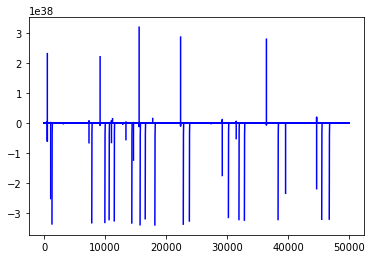

In [18]:

dl = DataLogger()
dl.set_file_handle(LOGFILE)
dl.write_preamble()

for sp in SEARCHED_PARAMS:
    events = search_param(sp, dl, 1, params[mn.get_parameter_names().index(sp)] * 1.1, write_header=True)
    for event in events:
        search_param(sp, dl, event[0], event[1], write_header=False)
